<a href="https://colab.research.google.com/github/Viny2030/UNED/blob/main/practica02L_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/NLP/1_Introduccion/Introduccion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

In [ ]:
print("A: Instalacion de Stanza")

A: Instalacion de Stanza


In [ ]:
!pip install stanza

In [ ]:
print("B: descarga de bibliotecas adicionales")

B: descarga de bibliotecas adicionales


In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
("C: Importacion de Stanza y descarga de stanza en ingles")

'C: Importacion de Stanza y descarga de stanza en ingles'

In [ ]:
import stanza

# Descarga el pipeline para el español
stanza.download('en')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
!pip install --upgrade stanza

In [ ]:
print("D: 4.1-Lema de las palabras del archivo input.txt, y conversion a archivo json")


D: 4.1-Lema de las palabras del archivo input.txt, y conversion a archivo json


In [ ]:
import stanza
import json

def extract_lemmas(text):
    """
    Extracts lemmas from the given text using Stanza.

    Args:
        text: The input text.

    Returns:
        A list of lemmas extracted from the text.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma')
    doc = nlp(text)
    lemmas = []

    for sentence in doc.sentences:
        for word in sentence.words:
            lemmas.append(word.lemma)

    return lemmas

# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

extracted_lemmas = extract_lemmas(text)

# Save lemmas to JSON file
with open('lemmas.json', 'w') as f:
    json.dump(extracted_lemmas, f, indent=4)

print(extracted_lemmas)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


['Jane', 'buy', 'I', 'this', 'book', '.', 'Jane', 'buy', 'a', 'book', 'for', 'I', '.', 'she', 'drop', 'a', 'line', 'to', 'he', '.', 'thank', 'you', '.', 'she', 'sleep', '.', 'I', 'sleep', 'a', 'lot', '.', 'I', 'be', 'bear', 'in', 'Madrid', '.', 'the', 'cat', 'be', 'chase', 'by', 'the', 'dog', '.', 'I', 'be', 'bear', 'in', 'Madrid', 'during', '1995', '.', 'out', 'of', 'all', 'this', ',', 'something', 'good', 'will', 'come', '.', 'Susan', 'leave', 'after', 'the', 'rehearsal', '.', 'she', 'do', 'it', 'well', '.']


In [ ]:
print("D: 4.2.Identificando entidades nombradas en input.txt, y conversion a archivo json")

D: 4.2.Identificando entidades nombradas en input.txt, y conversion a archivo json


In [ ]:
import stanza

# Download the English model with NER
stanza.download('en', processors='tokenize,mwt,pos,lemma,ner')

# Initialize the pipeline
nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma,ner')

# Process the text
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

entities = []

for sent in doc.sentences:
    for ent in sent.ents:
        entity_dict = {"text": ent.text, "type": ent.type}
        entities.append(entity_dict)

# Convertir la lista de entidades a JSON
json_data = json.dumps(entities, indent=4)

# Imprimir o guardar el JSON
print(json_data)

# Para guardar en un archivo:
with open('entities.json', 'w') as f:
    f.write(json_data)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package                   |
-----------------------------------------------
| tokenize        | combined                  |
| mwt             | combined                  |
| pos             | combined_charlm           |
| lemma           | combined_nocharlm         |
| ner             | ontonotes-ww-multi_charlm |
| pretrain        | conll17                   |
| backward_charlm | 1billion                  |
| forward_charlm  | 1billion                  |

INFO:stanza:File exists: /root/stanza_resources/en/tokenize/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/mwt/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/pos/combined_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/lemma/combined_nocharlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/ner/ontonotes-ww-multi_charl

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| pos       | combined_charlm           |
| lemma     | combined_nocharlm         |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "text": "Jane",
        "type": "PERSON"
    },
    {
        "text": "Jane",
        "type": "PERSON"
    },
    {
        "text": "Madrid",
        "type": "GPE"
    },
    {
        "text": "Madrid",
        "type": "GPE"
    },
    {
        "text": "1995",
        "type": "DATE"
    },
    {
        "text": "Susan",
        "type": "PERSON"
    }
]


In [ ]:
print("E: Análisis sintáctico de dependencias que te permita extraer de cada oración las proposiciones correspondientes a las estructuras,1.NVN sujeto-verbo-objeto (cuando haya objeto directo)")

E: Análisis sintáctico de dependencias que te permita extraer de cada oración las proposiciones correspondientes a las estructuras,1.NVN sujeto-verbo-objeto (cuando haya objeto directo)


In [ ]:
import stanza
import json


def extract_nvn_propositions(sentence):
  """
  Extracts verb-noun relationships from a sentence using Stanza.

  Args:
    sentence: A sentence processed by Stanza.

  Returns:
    A list of dictionaries, where each dictionary represents a verb-noun relationship found.
  """

  nvn_structures = []
  root = None

  # Find the root verb of the sentence
  for word in sentence.words:
    if word.head == 0:  # Check if word is the syntactic root (head = 0)
      root = word
      break

  if root:
    verb = root.lemma  # Extract the lemma (base form) of the verb

    # Consider nouns related to the verb through various dependencies
    for dep in sentence.dependencies:
      if dep[0].id == root.id:  # Check if dependent word relates to the root
        noun = sentence.words[dep[2].id - 1].lemma  # Extract lemma of noun
        nvn_structure = {
            "verb": verb,
            "noun": noun,
            "dependency_label": dep[1]  # Include dependency label for context
        }
        nvn_structures.append(nvn_structure)

  return nvn_structures

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
doc = nlp(text)
all_nvn_structures = []

for sent in doc.sentences:
    propositions = extract_nvn_propositions(sent)
    if propositions:
        all_nvn_structures.extend(propositions)

# Guardar en un archivo JSON
with open('nvn_structures.json', 'w') as f:
    json.dump(all_nvn_structures, f, indent=4)

# Imprimir las proposiciones encontradas
for sent in doc.sentences:
    propositions = extract_nvn_propositions(sent)
    if propositions:
        print(f"Oración: {sent.text}")
        for prop in propositions:
            print(f"  - {prop}")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Oración: Jane bought me these books.
  - {'verb': 'buy', 'noun': 'Jane', 'dependency_label': 'nsubj'}
  - {'verb': 'buy', 'noun': 'I', 'dependency_label': 'iobj'}
  - {'verb': 'buy', 'noun': 'book', 'dependency_label': 'obj'}
  - {'verb': 'buy', 'noun': '.', 'dependency_label': 'punct'}
Oración: Jane bought a book for me.
  - {'verb': 'buy', 'noun': 'Jane', 'dependency_label': 'nsubj'}
  - {'verb': 'buy', 'noun': 'book', 'dependency_label': 'obj'}
  - {'verb': 'buy', 'noun': 'I', 'dependency_label': 'obl'}
  - {'verb': 'buy', 'noun': '.', 'dependency_label': 'punct'}
Oración: She dropped a line to him.
  - {'verb': 'drop', 'noun': 'she', 'dependency_label': 'nsubj'}
  - {'verb': 'drop', 'noun': 'line', 'dependency_label': 'obj'}
  - {'verb': 'drop', 'noun': 'he', 'dependency_label': 'obl'}
  - {'verb': 'drop', 'noun': '.', 'dependency_label': 'punct'}
Oración: Thank you.
  - {'verb': 'thank', 'noun': 'you', 'dependency_label': 'obj'}
  - {'verb': 'thank', 'noun': '.', 'dependency_label

In [ ]:
print("E: Análisis sintáctico de dependencias,3.1.NVN sujeto-verbo-objeto (cuando haya objeto directo), conversion a archivo json")

E: Análisis sintáctico de dependencias,3.1.NVN sujeto-verbo-objeto (cuando haya objeto directo), conversion a archivo json


In [ ]:
import stanza
import json

def extract_nvn_dependencies(text):
    """
    Extrae estructuras NVN (sujeto-verbo-objeto) utilizando el análisis de dependencias de Stanza.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios, donde cada diccionario representa una estructura NVN encontrada.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    nvn_structures = []

    for sentence in doc.sentences:
        root = None
        for word in sentence.words:
            if word.head == 0:
                root = word
                break

        if root:
            verb = root.lemma
            subject = None
            object_ = None

            for dep in sentence.dependencies:
                if dep[0].id == root.id:
                    if dep[1] == 'nsubj':
                        subject = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'dobj':
                        object_ = sentence.words[dep[2].id - 1].lemma

            if subject and object_:  # Solo si se encuentran sujeto y objeto
                nvn_structure = {
                    "verb": verb,
                    "subject": subject,
                    "object": object_
                }
                nvn_structures.append(nvn_structure)

    return nvn_structures

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvn_structures = extract_nvn_dependencies(text)

# Guardar en un archivo JSON
with open('nvn_structures1.json', 'w') as f:
    json.dump(nvn_structures, f, indent=4)

print(nvn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[]


In [ ]:
print("F: Análisis sintáctico de dependencias,3.2-NV sujeto-verbo (cuando no haya objeto directo), y conversion a  archivos json ")

F: Análisis sintáctico de dependencias,3.2-NV sujeto-verbo (cuando no haya objeto directo), y conversion a  archivos json 


In [ ]:
import stanza
import json

def extract_nv_propositions(text):
    """
    Extrae proposiciones sujeto-verbo de un texto en inglés.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de proposiciones NV.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    nv_propositions = []

    for sentence in doc.sentences:
        for word in sentence.words:
            if word.deprel == 'nsubj':  # Verificamos si la palabra es un sujeto nominal
                subject = word.text
                for head in sentence.words:
                    if head.head == 0:  # Encontramos el verbo principal
                        verb = head.text
                        nv_propositions.append(f"{subject} {verb}")
                        break

    return nv_propositions

# Ejemplo de uso
text = ( "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps.")
propositions = extract_nv_propositions(text)

# Crear un diccionario con las oraciones y sus proposiciones
data = []
for i, sentence in enumerate(doc.sentences):
    data.append({
        "sentence": sentence.text,
        "propositions": propositions[i] if i < len(propositions) else []
    })

# Convertir los datos a formato JSON
json_data = json.dumps(data, indent=4)

# Imprimir el JSON
print(json_data)

# Guardar el JSON en un archivo
with open("propositions.json", "w") as outfile:
    outfile.write(json_data)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "propositions": "Jane bought"
    },
    {
        "sentence": "Jane bought a book for me.",
        "propositions": "Jane bought"
    },
    {
        "sentence": "She dropped a line to him.",
        "propositions": "She dropped"
    },
    {
        "sentence": "Thank you.",
        "propositions": "She sleeps"
    },
    {
        "sentence": "She sleeps.",
        "propositions": "I sleep"
    },
    {
        "sentence": "I sleep a lot.",
        "propositions": "something come"
    },
    {
        "sentence": "I was born in Madrid.",
        "propositions": "Susan left"
    },
    {
        "sentence": "the cat was chased by the dog.",
        "propositions": "She did"
    },
    {
        "sentence": "I was born in Madrid during 1995.",
        "propositions": "She sleeps"
    },
    {
        "sentence": "Out of all this , something good will come.",
        "propositions": "she sleeps"
    },
    {
        "s

In [ ]:
print("G: Análisis sintáctico de dependencias,3.3-Las proposiciones correspondientes a las estructuras:Todas las ocurrencias NVPN sujeto-verbo-preposición-complemento (una por cada complemento), y conversion a archivo json")

G: Análisis sintáctico de dependencias,3.3-Las proposiciones correspondientes a las estructuras:Todas las ocurrencias NVPN sujeto-verbo-preposición-complemento (una por cada complemento), y conversion a archivo json


In [ ]:
import stanza
import json

def extract_nvpn_propositions(text):
    """
    Extrae proposiciones NVPN (sujeto-verbo-preposición-complemento) de un texto.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios, donde cada diccionario representa una proposición NVPN.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    nvpn_propositions = []

    for sentence in doc.sentences:
        for word in sentence.words:
            if word.deprel == 'nsubj':  # Si la palabra es el sujeto
                subject = word.text
                # Check if the head is the root by comparing the index to 0
                if word.head == 0:  # Verificar si el padre es el verbo raíz
                    # Iterate through words in the sentence to find the root verb
                    for head_word in sentence.words:
                        if head_word.id == word.head:
                            verb = head_word.text
                            break  # Exit loop once root verb is found
                    else:  # If no root verb is found, continue to next word
                        continue

                    for child in sentence.words:  # Iterate over all words for children
                        if child.head == word.head and child.deprel in ['prep', 'mark']:
                            preposition = child.text
                            for grandchild in sentence.words:  # Iterate for grandchildren
                                if grandchild.head == child.id:
                                    complement = grandchild.text
                                    nvpn_propositions.append({
                                        "subject": subject,
                                        "verb": verb,
                                        "preposition": preposition,
                                        "complement": complement
                                    })

    return nvpn_propositions
# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvpn_propositions = extract_nvpn_propositions(text)

# Imprimir el resultado
print("G: Análisis sintáctico de dependencias, 3.3-Las proposiciones correspondientes a las estructuras:Todas las ocurrencias NVPN sujeto-verbo-preposición-complemento (una por cada complemento), y conversión a archivo json")

# Verificar si la lista de proposiciones está vacía
if nvpn_propositions:
    # Si la lista no está vacía, escribir en el archivo JSON
    with open('nvpn_propositions1.json', 'w') as f:
        json.dump(nvpn_propositions, f, indent=4)
else:
    print("No se encontraron proposiciones NVPN.")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


G: Análisis sintáctico de dependencias, 3.3-Las proposiciones correspondientes a las estructuras:Todas las ocurrencias NVPN sujeto-verbo-preposición-complemento (una por cada complemento), y conversión a archivo json
No se encontraron proposiciones NVPN.


In [ ]:
print("H: El análisis puede apoyarse en otra opción más potente es el uso de queries sobre el grafo de dependencias, y conversion archivo json ")

H: El análisis puede apoyarse en otra opción más potente es el uso de queries sobre el grafo de dependencias, y conversion archivo json 


In [ ]:
import stanza
import networkx as nx
import json

def analyze_dependency_graph(text):
  """
  Analiza el grafo de dependencias de un texto y devuelve su representación en JSON.

  Args:
      text: El texto de entrada.

  Returns:
      Un diccionario JSON que representa el grafo de dependencias.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)

  G = nx.DiGraph()

  for sentence in doc.sentences:
    for word in sentence.words:
      G.add_node(word.text, pos=word.upos)  # Agregamos la etiqueta POS como atributo del nodo

    for dep in sentence.dependencies:
      head = sentence.words[dep[0].id - 1].text
      dep_word = sentence.words[dep[2].id - 1].text
      rel = dep[1]
      G.add_edge(head, dep_word, label=rel)

  # Convertir el grafo a un diccionario JSON
  graph_json = {
      "nodes": [{"id": n, "label": n, "data": {"pos": G.nodes[n]["pos"]}} for n in G.nodes],
      "edges": [{"source": e[0], "target": e[1], "label": G.edges[e]["label"]} for e in G.edges]
  }

  return graph_json

# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

graph_json = analyze_dependency_graph(text)

# Puedes guardar el JSON en un archivo o procesarlo como necesites
print(json.dumps(graph_json, indent=4))  # Imprimir el JSON formateado

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


{
    "nodes": [
        {
            "id": "Jane",
            "label": "Jane",
            "data": {
                "pos": "PROPN"
            }
        },
        {
            "id": "bought",
            "label": "bought",
            "data": {
                "pos": "VERB"
            }
        },
        {
            "id": "me",
            "label": "me",
            "data": {
                "pos": "PRON"
            }
        },
        {
            "id": "these",
            "label": "these",
            "data": {
                "pos": "DET"
            }
        },
        {
            "id": "books",
            "label": "books",
            "data": {
                "pos": "NOUN"
            }
        },
        {
            "id": ".",
            "label": ".",
            "data": {
                "pos": "PUNCT"
            }
        },
        {
            "id": "a",
            "label": "a",
            "data": {
                "pos": "DET"
            }
        

In [ ]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


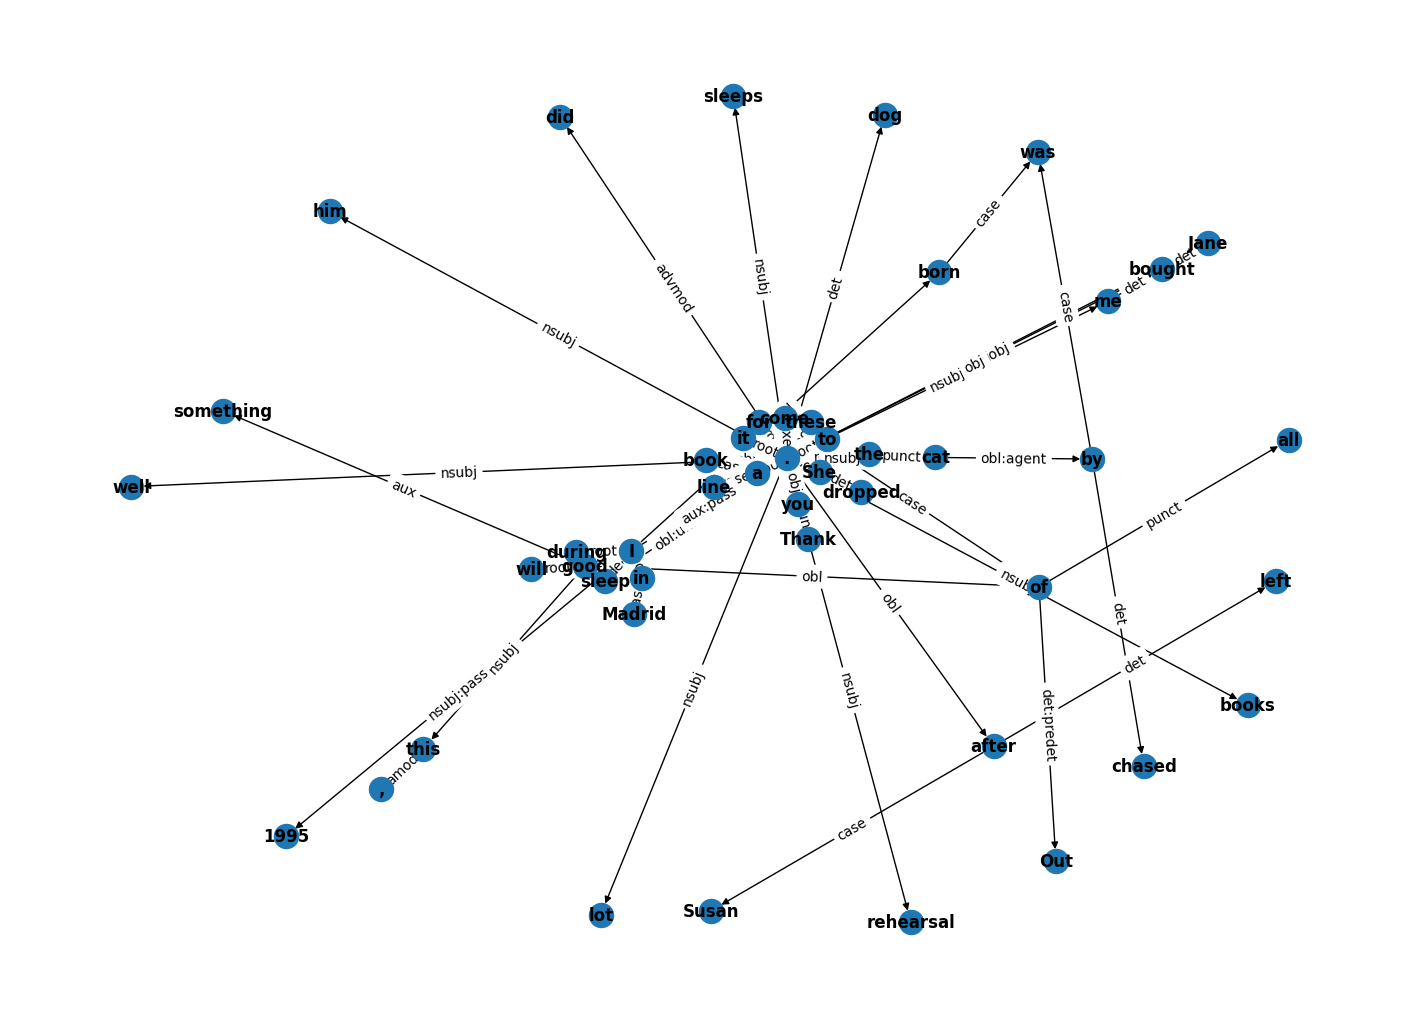

In [ ]:
# Crea un grafo vacío
G = nx.DiGraph()

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""
doc = nlp(text)

# Agrega los nodos (palabras) al grafo
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)
# Agrega las aristas (relaciones) al grafo
for sent in doc.sentences:
    for dep in sent.dependencies:
        # dep[0].id is the index of the governor (head) in the sentence, starting at 1
        # We need to subtract 1 to get the correct index in the list sent.words
        head = sent.words[dep[0].id - 3].text
        # Similar for the dependent word
        dep_word = sent.words[dep[2].id - 3].text
        rel = dep[1]  # dep[1] is the dependency type
        G.add_edge(head, dep_word, label=rel)


# Dibuja el grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

In [ ]:
import stanza
import networkx as nx
import json

def analyze_dependency_graph(text):
  """
  Analiza el grafo de dependencias de un texto y devuelve su representación en JSON.

  Args:
      text: El texto de entrada.

  Returns:
      Un diccionario JSON que representa el grafo de dependencias.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)

  G = nx.DiGraph()

  # Agrega los nodos (palabras) al grafo
  for sent in doc.sentences:
    for word in sent.words:
      G.add_node(word.text, pos=word.upos)  # Agregar etiqueta POS como dato del nodo

  # Agrega las aristas (relaciones) al grafo
  for sent in doc.sentences:
    for dep in sent.dependencies:
      # Correct indexing for governor (head)
      head = sent.words[dep[0].id - 1].text  # Subtract 1 for correct index

      # Correct indexing for dependent word
      dep_word = sent.words[dep[2].id - 1].text  # Subtract 1 for correct index

      rel = dep[1]  # dep[1] is the dependency type
      G.add_edge(head, dep_word, label=rel)

  # Convertir el grafo a un diccionario JSON
  graph_json = {
      "nodes": [{"id": n, "label": n, "data": {"pos": G.nodes[n]["pos"]}} for n in G.nodes],
      "edges": [{"source": e[0], "target": e[1], "label": G.edges[e]["label"]} for e in G.edges]
  }

  return graph_json

# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

graph_json = analyze_dependency_graph(text)

# Puedes guardar el JSON en un archivo o procesarlo como necesites

# Guardar en un archivo (opcional)
with open('dependency_graph.json', 'w') as f:
  json.dump(graph_json, f, indent=4)

# Imprimir el JSON formateado
print(json.dumps(graph_json, indent=4))

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


{
    "nodes": [
        {
            "id": "Jane",
            "label": "Jane",
            "data": {
                "pos": "PROPN"
            }
        },
        {
            "id": "bought",
            "label": "bought",
            "data": {
                "pos": "VERB"
            }
        },
        {
            "id": "me",
            "label": "me",
            "data": {
                "pos": "PRON"
            }
        },
        {
            "id": "these",
            "label": "these",
            "data": {
                "pos": "DET"
            }
        },
        {
            "id": "books",
            "label": "books",
            "data": {
                "pos": "NOUN"
            }
        },
        {
            "id": ".",
            "label": ".",
            "data": {
                "pos": "PUNCT"
            }
        },
        {
            "id": "a",
            "label": "a",
            "data": {
                "pos": "DET"
            }
        

In [ ]:
print("I: 6.Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: Refinamiento de las Reglas de Extracción:Considerar verbos auxiliares:1. No todos los verbos principales son verbos léxicos. Los verbos auxiliares como \"be\", \"have\" y \"do\" a menudo forman parte del verbo principales, y conversion de sallida a archivo json")

I: 6.Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: Refinamiento de las Reglas de Extracción:Considerar verbos auxiliares:1. No todos los verbos principales son verbos léxicos. Los verbos auxiliares como "be", "have" y "do" a menudo forman parte del verbo principales, y conversion de sallida a archivo json


In [ ]:
import stanza
import json

def extract_propositions(text):
  """
  Extrae proposiciones de un texto utilizando Stanza, considerando verbos auxiliares.

  Args:
      text: El texto de entrada.

  Returns:
      Una lista de diccionarios JSON que representan las proposiciones extraídas.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)
  propositions = []

  for sent in doc.sentences:
    root = None
    for word in sent.words:
      if word.head == 0:
        root = word
        break

    if root:
      proposition = {}
      proposition['verb'] = ""  # Inicializamos el verbo como una cadena vacía

      # Identificar el verbo principal (considerando auxiliares)
      verb = root.text  # Assign initial value to verb
      if root.deprel != 'ROOT':  # Check for non-root verbs and search for auxiliaries
        for dep in sent.dependencies:
          if dep[0].id == root.id and dep[1] == 'aux':
            verb = dep[2].text + " " + root.text
            break

      proposition['verb'] = verb

      subject = None
      direct_object = None
      # Iterate through the sentence's dependencies to find subject and object
      for dep in sent.dependencies:
        if dep[0].id == root.id and dep[1] == 'nsubj':
          subject = dep[2].text
        elif dep[0].id == root.id and dep[1] == 'dobj':
          direct_object = dep[2].text

      proposition['subject'] = subject
      proposition['direct_object'] = direct_object
      propositions.append(proposition)

  return propositions

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

propositions_json = json.dumps(extract_propositions(text), indent=4)
print(propositions_json)  # Imprime las proposiciones en formato JSON

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[
    {
        "verb": "bought",
        "subject": "Jane",
        "direct_object": null
    },
    {
        "verb": "bought",
        "subject": "Jane",
        "direct_object": null
    },
    {
        "verb": "dropped",
        "subject": "She",
        "direct_object": null
    },
    {
        "verb": "Thank",
        "subject": null,
        "direct_object": null
    },
    {
        "verb": "sleeps",
        "subject": "She",
        "direct_object": null
    },
    {
        "verb": "sleep",
        "subject": "I",
        "direct_object": null
    },
    {
        "verb": "born",
        "subject": null,
        "direct_object": null
    },
    {
        "verb": "chased",
        "subject": null,
        "direct_object": null
    },
    {
        "verb": "born",
        "subject": null,
        "direct_object": null
    },
    {
        "verb": "will come",
        "subject": "something",
        "direct_object": null
    },
    {
        "verb": "left",
        "subject":

In [ ]:
print("I: 6.Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: Refinamiento de las Reglas de Extracción:Considerar verbos auxiliares: 2.Manejar construcciones pasivas, y conversion a archivo json ")

I: 6.Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: Refinamiento de las Reglas de Extracción:Considerar verbos auxiliares: 2.Manejar construcciones pasivas, y conversion a archivo json 


In [ ]:
import stanza
import json

def extract_propositions(text):
    """
    Extrae proposiciones de un texto utilizando Stanza, considerando construcciones pasivas,
    verbos auxiliares, y otras estructuras gramaticales.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios JSON que representan las proposiciones extraídas.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    propositions = []

    for sentence in doc.sentences:
        root = None
        for word in sentence.words:
            if word.head == 0:
                root = word
                break

        if root:
            proposition = {
                'verb': "",
                'verb_pos': "",
                'is_passive': False,
                'subject': None,
                'direct_object': None,
                'indirect_object': None,
            }

            # Identificar el verbo principal y sus auxiliares
            verb = root.text
            if root.deprel != 'ROOT':
                for dep in sentence.dependencies:
                    if dep[0].id == root.id and dep[1] == 'aux':
                        verb = dep[2].text + " " + root.text
                        break
            proposition['verb'] = verb
            proposition['verb_pos'] = root.upos

            # Identificar voz pasiva y asignar sujeto y objeto
            is_passive = False
            for dep in sentence.dependencies:
                if dep[0].id == root.id and dep[1] == 'auxpass':
                    is_passive = True
                    break

            for dep in sentence.dependencies:
                if is_passive:
                    if dep[0].id == root.id and dep[1] == 'nsubjpass':
                        proposition['subject'] = dep[2].text
                    elif dep[0].id == root.id and dep[1] == 'obj':
                        proposition['direct_object'] = dep[2].text
                else:
                    if dep[0].id == root.id and dep[1] == 'nsubj':
                        proposition['subject'] = dep[2].text
                    elif dep[0].id == root.id and dep[1] == 'dobj':
                        proposition['direct_object'] = dep[2].text
                    elif dep[0].id == root.id and dep[1] == 'iobj':  # Agregar complemento indirecto
                        proposition['indirect_object'] = dep[2].text

            propositions.append(proposition)

    return propositions

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

propositions = extract_propositions(text)

# Guardar las proposiciones en un archivo JSON
with open('propositions_pasivas.json', 'w') as f:
    json.dump(propositions, f, indent=4)

# Imprimir las proposiciones en formato JSON
print(json.dumps(propositions, indent=4))

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[
    {
        "verb": "bought",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": "Jane",
        "direct_object": null,
        "indirect_object": "me"
    },
    {
        "verb": "bought",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": "Jane",
        "direct_object": null,
        "indirect_object": null
    },
    {
        "verb": "dropped",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": "She",
        "direct_object": null,
        "indirect_object": null
    },
    {
        "verb": "Thank",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": null,
        "direct_object": null,
        "indirect_object": null
    },
    {
        "verb": "sleeps",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": "She",
        "direct_object": null,
        "indirect_object": null
    },
    {
        "verb": "sleep",
        "verb_pos": "VERB",
        "is_p

In [ ]:
print("J: 6.Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: 3.Utilizando patrones regulares, y conversion a archivo json ")

J: 6.Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: 3.Utilizando patrones regulares, y conversion a archivo json 


In [ ]:
import re
import json

def extract_propositions_with_regex(text):
    """
    Extrae proposiciones utilizando expresiones regulares a partir del texto dado.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios, donde cada diccionario representa una proposición
        extraída mediante expresiones regulares.
    """

    # Patrones regulares (simplificados para este ejemplo)
    pattern_svo = r"(?P<subject>\w+) (?P<verb>\w+) (?P<object>\w+)"

    # Aplicación de los patrones
    matches_svo = re.finditer(pattern_svo, text)

    # Extracción de diccionarios
    propositions = [match.groupdict() for match in matches_svo]

    return propositions

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

propositions = extract_propositions_with_regex(text)

# Guardar las proposiciones en un archivo JSON
with open('propositions_regex.json', 'w') as f:
    json.dump(propositions, f, indent=4)

# Imprimir las proposiciones en formato JSON
print(json.dumps(propositions, indent=4))

[
    {
        "subject": "Jane",
        "verb": "bought",
        "object": "me"
    },
    {
        "subject": "Jane",
        "verb": "bought",
        "object": "a"
    },
    {
        "subject": "book",
        "verb": "for",
        "object": "me"
    },
    {
        "subject": "She",
        "verb": "dropped",
        "object": "a"
    },
    {
        "subject": "line",
        "verb": "to",
        "object": "him"
    },
    {
        "subject": "I",
        "verb": "sleep",
        "object": "a"
    },
    {
        "subject": "I",
        "verb": "was",
        "object": "born"
    },
    {
        "subject": "the",
        "verb": "cat",
        "object": "was"
    },
    {
        "subject": "chased",
        "verb": "by",
        "object": "the"
    },
    {
        "subject": "I",
        "verb": "was",
        "object": "born"
    },
    {
        "subject": "in",
        "verb": "Madrid",
        "object": "during"
    },
    {
        "subject": "Out",
        "v

In [ ]:
print("K: 7.En el proceso, sustituye todas las palabras comunes por su lema (e.g. ran --> run, runners --> runner), y conversion a archivo json")

K: 7.En el proceso, sustituye todas las palabras comunes por su lema (e.g. ran --> run, runners --> runner), y conversion a archivo json


In [ ]:
import stanza
import json

def analyze_dependency_graph(text, include_ner=True):
  """
  Analyzes the dependency graph of a given text using Stanza,
  substituting words by their lemma or named entity category.

  Args:
      text: The input text.
      include_ner (bool, optional): Whether to include Named Entity Recognition (NER). Defaults to True.

  Returns:
      A list of dictionaries, where each dictionary represents a dependency relation.
  """

  # Download the English model with optional NER
  stanza.download('en', processors='tokenize,mwt,pos,lemma,depparse' + (',ner' if include_ner else ''))

  # Create a pipeline explicitly including NER if desired
  nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma' + (',ner' if include_ner else ''))

  doc = nlp(text)
  dependencies = []

  for sentence in doc.sentences:
    for word in sentence.words:
      # Check if NER is enabled and the word has an entity type
      if include_ner and hasattr(word, 'ent_type') and word.ent_type != "O":
        word_text = word.ent_type  # Use entity type for named entities (except 'O')
      else:
        word_text = word.lemma  # Use lemma by default

      dependency = {
          "word": word_text,
          "pos": word.upos,
          "lemma": word.lemma,
          "head": word.head,
          "deprel": word.deprel
      }
      dependencies.append(dependency)

  return dependencies

# Example usage
text = """Jane bought me these books. (PERSON)
Jane bought a book for me. (PERSON)
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid. (LOCATION)
the cat was chased by the dog.
I was born in Madrid during 1995. (LOCATION, DATE)
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

dependency_graph = analyze_dependency_graph(text)

# Save to JSON file
with open('dependency_graph_ner_lemmas.json', 'w') as f:
    json.dump(dependency_graph, f, indent=4)

print(dependency_graph)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package                   |
-----------------------------------------------
| tokenize        | combined                  |
| mwt             | combined                  |
| pos             | combined_charlm           |
| lemma           | combined_nocharlm         |
| depparse        | combined_charlm           |
| ner             | ontonotes-ww-multi_charlm |
| pretrain        | conll17                   |
| backward_charlm | 1billion                  |
| forward_charlm  | 1billion                  |

INFO:stanza:File exists: /root/stanza_resources/en/tokenize/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/mwt/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/pos/combined_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/lemma/combined_nocharlm.pt
INFO:stanza:File exists: /root/

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| pos       | combined_charlm           |
| lemma     | combined_nocharlm         |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[{'word': 'Jane', 'pos': 'PROPN', 'lemma': 'Jane', 'head': None, 'deprel': None}, {'word': 'buy', 'pos': 'VERB', 'lemma': 'buy', 'head': None, 'deprel': None}, {'word': 'I', 'pos': 'PRON', 'lemma': 'I', 'head': None, 'deprel': None}, {'word': 'this', 'pos': 'DET', 'lemma': 'this', 'head': None, 'deprel': None}, {'word': 'book', 'pos': 'NOUN', 'lemma': 'book', 'head': None, 'deprel': None}, {'word': '.', 'pos': 'PUNCT', 'lemma': '.', 'head': None, 'deprel': None}, {'word': '(', 'pos': 'PUNCT', 'lemma': '(', 'head': None, 'deprel': None}, {'word': 'person', 'pos': 'NOUN', 'lemma': 'person', 'head': None, 'deprel': None}, {'word': ')', 'pos': 'PUNCT', 'lemma': ')', 'head': None, 'deprel': None}, {'word': 'Jane', 'pos': 'PROPN', 'lemma': 'Jane', 'head': None, 'deprel': None}, {'word': 'buy', 'pos': 'VERB', 'lemma': 'buy', 'head': None, 'deprel': None}, {'word': 'a', 'pos': 'DET', 'lemma': 'a', 'head': None, 'deprel': None}, {'word': 'book', 'pos': 'NOUN', 'lemma': 'book', 'head': None, 'de

In [ ]:
print("L: 8.Opcionalmente, sustituye todas las entidades nombradas por su categoría (e.g. John Smith --> PERSON), y conversion a archivo json ")

L: 8.Opcionalmente, sustituye todas las entidades nombradas por su categoría (e.g. John Smith --> PERSON), y conversion a archivo json 


In [ ]:
import stanza
import json

def analyze_dependency_graph(text):
  """
  Analyzes the dependency graph of a given text using Stanza,
  substituting named entities by their category.

  Args:
      text: The input text.

  Returns:
      A list of dictionaries, where each dictionary represents a dependency relation.
  """

  # Download the English model with NER
  stanza.download('en', processors='tokenize,mwt,pos,lemma,depparse,ner')

  # Create a pipeline including NER
  nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma,ner,depparse')

  doc = nlp(text)
  dependencies = []

  for sentence in doc.sentences:
    for word in sentence.words:
      # Check if NER is enabled and the word has an entity type
      if hasattr(word, 'ent_type') and word.ent_type != "O":
        word_text = word.ent_type  # Use entity type for all named entities (except 'O')
      else:
        word_text = word.text  # Use original text for non-named entities

      dependency = {
          "word": word_text,
          "pos": word.upos,
          "lemma": word.lemma,
          "head": word.head,
          "deprel": word.deprel
      }
      dependencies.append(dependency)

  return dependencies

# Example usage
text = """Jane bought me these books. (PERSON)
Jane bought a book for me. (PERSON)
She dropped a line to him. Thank you. (PERSON)
She sleeps.
I sleep a lot.
I was born in Madrid. (LOCATION)
the cat was chased by the dog.
I was born in Madrid during 1995. (LOCATION, DATE)
Out of all this , something good will come.
Susan left after the rehearsal. She did it well. (PERSON)"""

dependency_graph = analyze_dependency_graph(text)

# Save to JSON file
with open('dependency_graph_ner_categories.json', 'w') as f:
    json.dump(dependency_graph, f, indent=4)

print(dependency_graph)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package                   |
-----------------------------------------------
| tokenize        | combined                  |
| mwt             | combined                  |
| pos             | combined_charlm           |
| lemma           | combined_nocharlm         |
| depparse        | combined_charlm           |
| ner             | ontonotes-ww-multi_charlm |
| pretrain        | conll17                   |
| backward_charlm | 1billion                  |
| forward_charlm  | 1billion                  |

INFO:stanza:File exists: /root/stanza_resources/en/tokenize/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/mwt/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/pos/combined_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/lemma/combined_nocharlm.pt
INFO:stanza:File exists: /root/

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| pos       | combined_charlm           |
| lemma     | combined_nocharlm         |
| depparse  | combined_charlm           |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[{'word': 'Jane', 'pos': 'PROPN', 'lemma': 'Jane', 'head': 2, 'deprel': 'nsubj'}, {'word': 'bought', 'pos': 'VERB', 'lemma': 'buy', 'head': 0, 'deprel': 'root'}, {'word': 'me', 'pos': 'PRON', 'lemma': 'I', 'head': 2, 'deprel': 'iobj'}, {'word': 'these', 'pos': 'DET', 'lemma': 'this', 'head': 5, 'deprel': 'det'}, {'word': 'books', 'pos': 'NOUN', 'lemma': 'book', 'head': 2, 'deprel': 'obj'}, {'word': '.', 'pos': 'PUNCT', 'lemma': '.', 'head': 2, 'deprel': 'punct'}, {'word': '(', 'pos': 'PUNCT', 'lemma': '(', 'head': 2, 'deprel': 'punct'}, {'word': 'PERSON', 'pos': 'NOUN', 'lemma': 'person', 'head': 5, 'deprel': 'obl:unmarked'}, {'word': ')', 'pos': 'PUNCT', 'lemma': ')', 'head': 2, 'deprel': 'punct'}, {'word': 'Jane', 'pos': 'PROPN', 'lemma': 'Jane', 'head': 5, 'deprel': 'nsubj'}, {'word': 'bought', 'pos': 'VERB', 'lemma': 'buy', 'head': 0, 'deprel': 'root'}, {'word': 'a', 'pos': 'DET', 'lemma': 'a', 'head': 7, 'deprel': 'det'}, {'word': 'book', 'pos': 'NOUN', 'lemma': 'book', 'head': 5,

In [ ]:
print("M: 9.Finalmente, ordena las proposiciones obtenidas de mayor a menor frecuencia y conversion a archivo json  ")

M: 9.Finalmente, ordena las proposiciones obtenidas de mayor a menor frecuencia y conversion a archivo json  


In [ ]:
import stanza

def analyze_dependency_graph(text):
  """
  Analiza el grafo de dependencias de un texto dado utilizando Stanza,
  sustituyendo las entidades nombradas por su categoría (si está habilitado).

  Args:
      text: El texto de entrada.

  Returns:
      Una lista de diccionarios, donde cada diccionario representa una relación de dependencia.
  """

  # Descarga el modelo de inglés con los procesadores necesarios
  stanza.download('en', processors='tokenize,mwt,pos,lemma,depparse')

  # Crea el pipeline de procesamiento
  nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma,depparse')

  doc = nlp(text)
  dependencies = []

  for sentence in doc.sentences:
    for word in sentence.words:
      dependency = {
          "word": word.text,  # Usamos word.text en lugar de word.lemma o ent_type
          "pos": word.upos,
          "head": word.head,
          "deprel": word.deprel
      }
      dependencies.append(dependency)

  return dependencies

def find_most_frequent_propositions(dependencies):
  """
  Encuentra las proposiciones más frecuentes en el grafo de dependencias.

  Args:
      dependencies: Lista de diccionarios representando las relaciones de dependencia.

  Returns:
      Una lista de tuplas (proposición, frecuencia), ordenada de mayor a menor frecuencia.
  """
  propositions = []
  for dependency in dependencies:
    propositions.append((dependency['deprel'], dependency['pos']))

  prop_counts = {}
  for prop in propositions:
    prop_counts[prop] = prop_counts.get(prop, 0) + 1

  sorted_props = sorted(prop_counts.items(), key=lambda x: x[1], reverse=True)
  return sorted_props

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

dependencies = analyze_dependency_graph(text)
most_frequent_props = find_most_frequent_propositions(dependencies)

print("Proposiciones ordenadas por frecuencia:")
for prop, count in most_frequent_props:
  print(f"{prop}: {count}")
# Guarda los resultados en un archivo JSON
with open('propositions_mayor_menor_frec.json', 'w') as f:
    json.dump(most_frequent_props, f, indent=4)

print(most_frequent_props)


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package           |
---------------------------------------
| tokenize        | combined          |
| mwt             | combined          |
| pos             | combined_charlm   |
| lemma           | combined_nocharlm |
| depparse        | combined_charlm   |
| pretrain        | conll17           |
| backward_charlm | 1billion          |
| forward_charlm  | 1billion          |

INFO:stanza:File exists: /root/stanza_resources/en/tokenize/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/mwt/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/pos/combined_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/lemma/combined_nocharlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/depparse/combined_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/pretrain/conll17.pt
INFO:stan

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Proposiciones ordenadas por frecuencia:
('punct', 'PUNCT'): 13
('root', 'VERB'): 12
('case', 'ADP'): 8
('det', 'DET'): 7
('nsubj', 'PRON'): 5
('nsubj', 'PROPN'): 3
('obj', 'NOUN'): 3
('obl', 'PRON'): 3
('aux:pass', 'AUX'): 3
('obj', 'PRON'): 2
('nsubj:pass', 'PRON'): 2
('obl', 'PROPN'): 2
('iobj', 'PRON'): 1
('obl:unmarked', 'NOUN'): 1
('nsubj:pass', 'NOUN'): 1
('obl:agent', 'NOUN'): 1
('obl', 'NUM'): 1
('fixed', 'ADP'): 1
('det:predet', 'DET'): 1
('amod', 'ADJ'): 1
('aux', 'AUX'): 1
('obl', 'NOUN'): 1
('advmod', 'ADV'): 1
[(('punct', 'PUNCT'), 13), (('root', 'VERB'), 12), (('case', 'ADP'), 8), (('det', 'DET'), 7), (('nsubj', 'PRON'), 5), (('nsubj', 'PROPN'), 3), (('obj', 'NOUN'), 3), (('obl', 'PRON'), 3), (('aux:pass', 'AUX'), 3), (('obj', 'PRON'), 2), (('nsubj:pass', 'PRON'), 2), (('obl', 'PROPN'), 2), (('iobj', 'PRON'), 1), (('obl:unmarked', 'NOUN'), 1), (('nsubj:pass', 'NOUN'), 1), (('obl:agent', 'NOUN'), 1), (('obl', 'NUM'), 1), (('fixed', 'ADP'), 1), (('det:predet', 'DET'), 1), (

In [ ]:
print("N: Por completitud, en el fichero de salida se incluye la estructura NVNPN, que no se menciona en el enunciado. y conversion a archivo json ")

N: Por completitud, en el fichero de salida se incluye la estructura NVNPN, que no se menciona en el enunciado. y conversion a archivo json 


In [178]:
import stanza
import json

def extract_nvnpn_structures(text):
  """
  Extrae estructuras NVNPN (verbo-sujeto-objeto-complemento-predicativo) de un texto utilizando Stanza.

  Args:
      text: El texto de entrada en ingles

  Returns:
      Una lista de diccionarios, donde cada diccionario representa una estructura NVNPN encontrada.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)
  nvnpn_structures = []

  for sentence in doc.sentences:
    root = None
    for word in sentence.words:
      if word.head == 0:
        root = word
        break

    if root:
      verb = root.text
      subject = None
      object_ = None
      complement = None
      predicative = None

      for dep in sentence.dependencies:
        if dep[0].id == root.id:
          if dep[1] == 'nsubj':
            subject = sentence.words[dep[2].id - 1].text
          elif dep[1] == 'dobj':
            object_ = sentence.words[dep[2].id - 1].text
          elif dep[1] == 'iobj':
            complement = sentence.words[dep[2].id - 1].text
          elif dep[1] == 'acomp':
            predicative = sentence.words[dep[2].id - 1].text

      # Verificar si se encontró una estructura NVNPN
      if subject and object_:
        nvnpn_structure = {
            "verbo": verb,
            "sujeto": subject,
            "objeto": object_,
            "complemento_indirecto": complement,
            "complemento_predicativo": predicative
        }
        nvnpn_structures.append(nvnpn_structure)

  return nvnpn_structures

# Ejemplo de uso (con texto en español)
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvnpn_structures = extract_nvnpn_structures(text)

# Guardar en un archivo JSON
with open('nvnpn_estructuras.json', 'w') as f:
  json.dump(nvnpn_structures, f, indent=4)

print(nvnpn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[]


In [ ]:
import stanza
import json

def extract_nvnpn_structures(text):
    """
    Extrae estructuras NVNPN (verbo-sujeto-objeto-complemento-predicativo) de un texto utilizando Stanza.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios, donde cada diccionario representa una estructura NVNPN encontrada.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    nvnpn_structures = []

    for sentence in doc.sentences:
        root = None
        for word in sentence.words:
            if word.head == 0:
                root = word
                break

        if root:
            # Inicializar variables
            verb = root.text
            subject = None
            object_ = None
            complement = None
            predicative = None

            # Buscar dependencias del verbo
            for dep in sentence.dependencies:
                if dep[0].id == root.id:
                    if dep[1] == 'nsubj':
                        subject = sentence.words[dep[2].id - 1].text
                    elif dep[1] == 'dobj':
                        object_ = sentence.words[dep[2].id - 1].text
                    elif dep[1] == 'iobj':  # Complemento indirecto
                        complement = sentence.words[dep[2].id - 1].text
                    elif dep[1] == 'acomp':  # Complemento predicativo
                        predicative = sentence.words[dep[2].id - 1].text

            # Verificar si se encontró una estructura NVNPN
            if subject and object_:  # Se requiere al menos sujeto y objeto
                nvnpn_structure = {
                    "verb": verb,
                    "subject": subject,
                    "object": object_,
                    "complement": complement,
                    "predicative": predicative
                }
                nvnpn_structures.append(nvnpn_structure)

    return nvnpn_structures

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvnpn_structures = extract_nvnpn_structures(text)

# Guardar en un archivo JSON
with open('nvnpn_structures.json', 'w') as f:
    json.dump(nvnpn_structures, f, indent=4)

print(nvnpn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[]


In [ ]:
print("O: Por completitud, en el fichero de salida se incluye la estructura NVNPN, Expandir la definición de NVNPN: Considerar variantes de la estructura, como oraciones pasivas, verbos frasales y construcciones idiomáticas.. y conversion a archivo json ")

O: Por completitud, en el fichero de salida se incluye la estructura NVNPN, Expandir la definición de NVNPN: Considerar variantes de la estructura, como oraciones pasivas, verbos frasales y construcciones idiomáticas.. y conversion a archivo json 


In [ ]:
import stanza
import json

def extract_nvnpn_structures(text):
    """
    Extrae estructuras NVNPN (verbo-sujeto-objeto-complemento-predicativo) de un texto
    utilizando Stanza, considerando variantes como oraciones pasivas,
    verbos frasales y construcciones idiomáticas (de manera simplificada).

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios, donde cada diccionario representa una estructura NVNPN encontrada.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    nvnpn_structures = []

    for sentence in doc.sentences:
        root = None
        for word in sentence.words:
            if word.head == 0:
                root = word
                break

        if root:
            verb = root.text
            subject = None
            object_ = None
            complement = None
            predicative = None

            # Manejar verbos frasales (simplificado)
            if root.deprel == 'prt':
                verb += " " + sentence.words[root.id - 1].text

            for dep in sentence.dependencies:
                if dep[0].id == root.id:
                    if dep[1] == 'nsubj':
                        subject = sentence.words[dep[2].id - 1].text
                    elif dep[1] == 'dobj':
                        object_ = sentence.words[dep[2].id - 1].text
                    elif dep[1] == 'iobj':
                        complement = sentence.words[dep[2].id - 1].text
                    elif dep[1] == 'acomp':
                        predicative = sentence.words[dep[2].id - 1].text
                    # Manejar oraciones pasivas
                    elif dep[1] == 'nsubjpass':
                        subject = sentence.words[dep[2].id - 1].text
                    elif dep[1] == 'obj' and is_passive(sentence, root):
                        object_ = sentence.words[dep[2].id - 1].text

            # Verificar si se encontró una estructura NVNPN
            if subject and object_:
                nvnpn_structure = {
                    "verb": verb,
                    "subject": subject,
                    "object": object_,
                    "complement": complement,
                    "predicative": predicative
                }
                nvnpn_structures.append(nvnpn_structure)

    return nvnpn_structures

def is_passive(sentence, root):
    """
    Verifica si la oración está en voz pasiva.

    Args:
        sentence: La oración analizada por Stanza.
        root: El nodo raíz de la oración.

    Returns:
        True si la oración está en voz pasiva, False en caso contrario.
    """
    for dep in sentence.dependencies:
        if dep[0].id == root.id and dep[1] == 'auxpass':
            return True
    return False

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvnpn_structures = extract_nvnpn_structures(text)

# Guardar en un archivo JSON
with open('nvnpn_structures_improved.json', 'w') as f:
    json.dump(nvnpn_structures, f, indent=4)

print(nvnpn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[]


In [ ]:
print("P: Por completitud, en el fichero de salida se incluye la estructura NVNPN, Expandir la definición de NVNPN: Utilizar un lematizador más preciso: Un lematizador más preciso puede ayudar a identificar las raíces de las palabras y mejorar la identificación de las estructuras sintácticas.. y conversion a archivo json ")

P: Por completitud, en el fichero de salida se incluye la estructura NVNPN, Expandir la definición de NVNPN: Utilizar un lematizador más preciso: Un lematizador más preciso puede ayudar a identificar las raíces de las palabras y mejorar la identificación de las estructuras sintácticas.. y conversion a archivo json 


In [175]:
import stanza
import json

def extract_nvnpn_structures(text):
    """
    Extrae estructuras NVNPN (verbo-sujeto-objeto-complemento-predicativo) de un texto
    utilizando Stanza, considerando variantes como oraciones pasivas,
    verbos frasales y construcciones idiomáticas.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios, donde cada diccionario representa una estructura NVNPN encontrada.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    nvnpn_structures = []

    for sentence in doc.sentences:
        root = None
        for word in sentence.words:
            if word.head == 0:
                root = word
                break

        if root:
            verb_lemma = root.lemma  # Utilizar el lema del verbo
            subject = None
            object_ = None
            complement = None
            predicative = None

            # Manejar verbos frasales (simplificado)
            if root.deprel == 'prt':
                verb_lemma += " " + sentence.words[root.id - 1].lemma

            for dep in sentence.dependencies:
                if dep[0].id == root.id:
                    if dep[1] == 'nsubj':
                        subject = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'dobj':
                        object_ = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'iobj':
                        complement = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'acomp':
                        predicative = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'nsubjpass':
                        subject = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'obj' and is_passive(sentence, root):
                        object_ = sentence.words[dep[2].id - 1].lemma

            # Manejar construcciones idiomáticas (simplificado)
            if is_idiom(sentence, root, verb_lemma):
                # Lógica para manejar construcciones idiomáticas
                # ...
                pass # Added pass to avoid syntax error


            if subject and object_:
                # This is the indented block that was missing
                nvnpn_structure = {
                    "verb": verb_lemma,
                    "subject": subject,
                    "object": object_,
                    "complement": complement,
                    "predicative": predicative
                }
                nvnpn_structures.append(nvnpn_structure)

    return nvnpn_structures

def is_passive(sentence, root):
    """
    Verifica si la oración está en voz pasiva.

    Args:
        sentence: La oración analizada por Stanza.
        root: El nodo raíz de la oración.

    Returns:
        True si la oración está en voz pasiva, False en caso contrario.
    """
    for dep in sentence.dependencies:
        if dep[0].id == root.id and dep[1] == 'auxpass':
            return True
    return False

def is_idiom(sentence, root, verb_lemma):
    # Lógica para identificar construcciones idiomáticas
    # ...
    return False  # Por defecto, no es un idioma

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvnpn_structures = extract_nvnpn_structures(text)

# Guardar en un archivo JSON
with open('nvnpn_structures_lemmas.json', 'w') as f:
    json.dump(nvnpn_structures, f, indent=4)

print(nvnpn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[]


In [ ]:
print("Q: Por completitud, en el fichero de salida se incluye la estructura NVNPN, Expandir la definición de NVNPN para el análisis sintáctico. y conversion a archivo json ")

Q: Por completitud, en el fichero de salida se incluye la estructura NVNPN, Expandir la definición de NVNPN para el análisis sintáctico. y conversion a archivo json 


In [172]:
import stanza
import json

def extract_nvnpn_structures(text):
    """
    Extrae estructuras NVNPN (verbo-sujeto-objeto-complemento-predicativo)
    de un texto utilizando Stanza.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios, donde cada diccionario representa
        una estructura NVNPN encontrada.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    nvnpn_structures = []

    for sentence in doc.sentences:
        root = None
        for word in sentence.words:
            if word.head == 0:
                root = word
                break

        if root:
            verb = root.lemma
            subject = None
            object_ = None
            complement = None
            predicative = None

            for dep in sentence.dependencies:
                if dep[0].id == root.id:
                    if dep[1] == 'nsubj':
                        subject = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'dobj':
                        object_ = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'iobj':  # Complemento indirecto
                        complement = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'acomp':  # Complemento predicativo
                        predicative = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'nsubjpass':  # Sujeto en voz pasiva
                        subject = sentence.words[dep[2].id - 1].lemma
                    elif dep[1] == 'obj' and is_passive(sentence, root):  # Objeto en voz pasiva
                        object_ = sentence.words[dep[2].id - 1].lemma

            if subject and object_:
                nvnpn_structure = {
                    "verb": verb,
                    "subject": subject,
                    "object": object_,
                    "complement": complement,
                    "predicative": predicative
                }
                nvnpn_structures.append(nvnpn_structure)

    return nvnpn_structures  # This line was incorrectly indented


def is_passive(sentence, root):
    """
    Verifica si la oración está en voz pasiva.

    Args:
        sentence: La oración procesada por Stanza.
        root: El nodo raíz de la oración.

    Returns:
        True si la oración está en voz pasiva, False en caso contrario.
    """
    for dep in sentence.dependencies:
        if dep[0].id == root.id and dep[1] == 'auxpass':
            return True
    return False

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvnpn_structures = extract_nvnpn_structures(text)

# Guardar en un archivo JSON
with open('nvnpn_structures.json', 'w') as f:
    json.dump(nvnpn_structures, f, indent=4)

print(nvnpn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[]


In [ ]:
print("R: Extraccion de estructuras NVNPN en stanza con diferentes etiquetas de dependencia y ajustar logica para la exttraccion y conversion a archivo json ")

R: Extraccion de estructuras NVNPN en stanza con diferentes etiquetas de dependencia y ajustar logica para la exttraccion y conversion a archivo json 


In [167]:
import json


def extract_nvnpn_structures(text):
  """
  Extracts NVNPN (Verb-Subject-Object-Complement-Predicative) structures from a text using Stanza.

  Args:
    text: The text to analyze.

  Returns:
    A list of dictionaries, where each dictionary represents an NVNPN structure
    found in the sentence. Each dictionary includes verb, subject, object,
    optional complement, and optional predicative.
  """

  nvnpn_structures = []
  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)

  for sentence in doc.sentences:
    root = None
    for word in sentence.words:
      # Check if it's the root verb (consider words with head=0 or head=word.id)
      if word.head == 0 or word.head == word.id:
        root = word
        break  # Exit the inner loop after finding the root

    if root:
      verb = root.lemma
      subject = None
      object_ = None
      complement = None
      predicative = None

      for dep in sentence.dependencies:
        if dep[0].id == root.id:
          if dep[1] in ['nsubj', 'nsubjpass', 'csubj', 'expl']:
            subject = sentence.words[dep[2].id - 1].lemma
          elif dep[1] in ['dobj', 'attr', 'ccomp', 'xcomp']:
            object_ = sentence.words[dep[2].id - 1].lemma
          elif dep[1] in ['iobj', 'obl']:
            complement = sentence.words[dep[2].id - 1].lemma
          elif dep[1] in ['acomp', 'appos']:
            predicative = sentence.words[dep[2].id - 1].lemma

      # Include structures with at least verb and subject (NV)
      if subject:
        nvnpn_structure = {
            "verb": verb,
            "subject": subject,
            "object": object_,
            "complement": complement,
            "predicative": predicative,
        }
        nvnpn_structures.append(nvnpn_structure)

  return nvnpn_structures


# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvnpn_structures = extract_nvnpn_structures(text)

# Guardar en un archivo JSON
with open('nvnpn_structures_expanded.json', 'w') as f:
  json.dump(nvnpn_structures, f, indent=4)

print(nvnpn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[{'verb': 'buy', 'subject': 'Jane', 'object': None, 'complement': 'I', 'predicative': None}, {'verb': 'buy', 'subject': 'Jane', 'object': None, 'complement': 'I', 'predicative': None}, {'verb': 'drop', 'subject': 'she', 'object': None, 'complement': 'he', 'predicative': None}, {'verb': 'sleep', 'subject': 'she', 'object': None, 'complement': None, 'predicative': None}, {'verb': 'sleep', 'subject': 'I', 'object': None, 'complement': None, 'predicative': None}, {'verb': 'come', 'subject': 'something', 'object': None, 'complement': 'this', 'predicative': None}, {'verb': 'leave', 'subject': 'Susan', 'object': None, 'complement': 'rehearsal', 'predicative': None}, {'verb': 'do', 'subject': 'she', 'object': None, 'complement': None, 'predicative': None}]


In [ ]:
print("S: Una estructura NVN del archivo input.txt . y conversion a archivo json ")

S: Una estructura NVN del archivo input.txt . y conversion a archivo json 


In [164]:
import json


def extract_nvn_structures(text):
  """
  Extracts verb-noun-verb (NVN) structures from a sentence using Stanza.

  Args:
    text: The sentence to analyze.

  Returns:
    A list of dictionaries, where each dictionary represents an NVN structure
    found in the sentence. Each dictionary includes verb, subject (noun), and
    optional object (another verb).
  """

  nvn_structures = []
  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)

  for sentence in doc.sentences:
    root = None
    for word in sentence.words:
      # Check if it's the root verb (consider words with head=0 or head=word.id)
      if word.head == 0 or word.head == word.id:
        root = word
        break  # Exit the inner loop after finding the root

    if root:
      verb = root.lemma
      subject = None
      object_ = None

      for dep in sentence.dependencies:
        if dep[0].id == root.id:
          if dep[1] in ['nsubj', 'nsubjpass', 'csubj']:  # Sujeto (subject)
            subject = sentence.words[dep[2].id - 1].lemma
          elif dep[1] in ['dobj', 'attr', 'ccomp']:  # Objeto o predicativo (object)
            object_ = sentence.words[dep[2].id - 1].lemma

      # Include propositions with verb and subject (NV) or verb, subject, and object (NVN)
      if subject:
        nvn_structure = {
            "verb": verb,
            "subject": subject,
            "object": object_,
        }
        nvn_structures.append(nvn_structure)

  return nvn_structures


# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nvn_structures = extract_nvn_structures(text)

# Guardar en un archivo JSON
with open('nvn_structures.json', 'w') as f:
  json.dump(nvn_structures, f, indent=4)

print(nvn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[{'verb': 'buy', 'subject': 'Jane', 'object': None}, {'verb': 'buy', 'subject': 'Jane', 'object': None}, {'verb': 'drop', 'subject': 'she', 'object': None}, {'verb': 'sleep', 'subject': 'she', 'object': None}, {'verb': 'sleep', 'subject': 'I', 'object': None}, {'verb': 'come', 'subject': 'something', 'object': None}, {'verb': 'leave', 'subject': 'Susan', 'object': None}, {'verb': 'do', 'subject': 'she', 'object': None}]


In [ ]:
print("U: Una estructura NV para extracccion del  archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json ")

U: Una estructura NV para extracccion del  archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
import stanza
import json

def extract_nvn_structures(text):
  """
  Extracts verb-subject (NV) structures from a text using Stanza.

  Args:
    text: The input text.

  Returns:
    A list of dictionaries, where each dictionary represents an NV structure found.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)
  nvn_structures = []

  for sentence in doc.sentences:
    root = None
    for word in sentence.words:
      if word.head == 0:
        root = word
        break

    if root:
      verb = root.lemma
      subject = None

      for dep in sentence.dependencies:
        if dep[0].id == root.id:
          if dep[1] in ['nsubj', 'nsubjpass', 'csubj']:
            subject = sentence.words[dep[2].id - 1].lemma

      if subject:
        nvn_structure = {
            "verb": verb,
            "subject": subject
        }
        nvn_structures.append(nvn_structure)

  return nvn_structures

# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nv_structures = extract_nvn_structures(text)

# Print the extracted structures
print(nv_structures)

# Save to JSON file
with open('nv_structures.json', 'w') as f:
  json.dump(nv_structures, f, indent=4)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[{'verb': 'buy', 'subject': 'Jane'}, {'verb': 'buy', 'subject': 'Jane'}, {'verb': 'drop', 'subject': 'she'}, {'verb': 'sleep', 'subject': 'she'}, {'verb': 'sleep', 'subject': 'I'}, {'verb': 'come', 'subject': 'something'}, {'verb': 'leave', 'subject': 'Susan'}, {'verb': 'do', 'subject': 'she'}]


In [ ]:
print("X: Identificar Una misma oración puede contener varias proposiciones, archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json ")

X: Identificar Una misma oración puede contener varias proposiciones, archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
import json


def extract_propositions(sentence):
  """
  Extracts potential subject-verb-object propositions from a sentence using Stanza.

  Args:
    sentence: A sentence processed by Stanza.

  Returns:
    A list of dictionaries, where each dictionary represents a proposition found
    in the sentence. Each proposition includes verb, subject, and object (if present).
  """

  propositions = []
  for word in sentence.words:
    # Check if it's the root verb (consider words with head=0 or head=word.id)
    if word.head == 0 or word.head == word.id:
      verb = word.lemma

      subject = None
      object_ = None

      for dep in sentence.dependencies:
        if dep[0].id == word.id:
          if dep[1] in ['nsubj', 'nsubjpass', 'csubj']:  # Consider various subject dependencies
            subject = sentence.words[dep[2].id - 1].lemma
          elif dep[1] == 'dobj':
            object_ = sentence.words[dep[2].id - 1].lemma

      # Include propositions with at least a verb and optionally an object
      if verb:
        proposition = {
            "verb": verb,
            "subject": subject,
            "object": object_,
        }
        propositions.append(proposition)

  return propositions


# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
doc = nlp(text)
all_propositions = []

for sent in doc.sentences:
  sentence_propositions = extract_propositions(sent)
  all_propositions.extend(sentence_propositions)

# Save to JSON file
with open('all_propositions.json', 'w') as f:
  json.dump(all_propositions, f, indent=4)

print(all_propositions)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[{'verb': 'buy', 'subject': 'Jane', 'object': None}, {'verb': 'buy', 'subject': 'Jane', 'object': None}, {'verb': 'drop', 'subject': 'she', 'object': None}, {'verb': 'thank', 'subject': None, 'object': None}, {'verb': 'sleep', 'subject': 'she', 'object': None}, {'verb': 'sleep', 'subject': 'I', 'object': None}, {'verb': 'bear', 'subject': None, 'object': None}, {'verb': 'chase', 'subject': None, 'object': None}, {'verb': 'bear', 'subject': None, 'object': None}, {'verb': 'come', 'subject': 'something', 'object': None}, {'verb': 'leave', 'subject': 'Susan', 'object': None}, {'verb': 'do', 'subject': 'she', 'object': None}]


In [ ]:
print("W: Debemos contar proposiciones (ej. \"she, do, it\"), archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json ")

W: Debemos contar proposiciones (ej. "she, do, it"), archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
import stanza
import json

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para extraer proposiciones y contarlas
def extraer_proposiciones_y_contar(sentence):
    proposiciones = []
    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PRON', 'PROPN', 'ADJ', 'ADV']:
            proposiciones.append(word.text)
    return proposiciones, len(proposiciones)

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y extraer proposiciones
for sentence in doc.sentences:
    proposiciones, num_proposiciones = extraer_proposiciones_y_contar(sentence)
    resultados.append({
        "sentence": sentence.text,
        "propositions": proposiciones,
        "num_propositions": num_proposiciones
    })

# Imprimir la salida en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON (opcional)
with open("proposiciones_contadas.json", "w") as f:
     json.dump(resultados, f, indent=4)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "propositions": [
            "Jane",
            "bought",
            "me",
            "books"
        ],
        "num_propositions": 4
    },
    {
        "sentence": "Jane bought a book for me.",
        "propositions": [
            "Jane",
            "bought",
            "book",
            "me"
        ],
        "num_propositions": 4
    },
    {
        "sentence": "She dropped a line to him.",
        "propositions": [
            "She",
            "dropped",
            "line",
            "him"
        ],
        "num_propositions": 4
    },
    {
        "sentence": "Thank you.",
        "propositions": [
            "Thank",
            "you"
        ],
        "num_propositions": 2
    },
    {
        "sentence": "She sleeps.",
        "propositions": [
            "She",
            "sleeps"
        ],
        "num_propositions": 2
    },
    {
        "sentence": "I sleep a lot.",
        "proposi

In [ ]:
print("Y: los ejemplos no se ha tratado la pasiva, Tratar las voz pasiva en archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

Y: los ejemplos no se ha tratado la pasiva, Tratar las voz pasiva en archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
import stanza
import json

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para extraer proposiciones y contarlas, considerando voz pasiva
def extraer_proposiciones_y_contar(sentence):
    proposiciones = []
    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PRON', 'PROPN', 'ADJ', 'ADV']:
            proposiciones.append(word)  # Append the Word object, not word.text

    # Identificar y manejar voz pasiva (simplificado)
    for i, word in enumerate(proposiciones):
        if word.lemma == "be" and i + 1 < len(proposiciones) and proposiciones[i + 1].text in ["chased", "eaten"]:  # Access text attribute here
            try:
                agente_index = [w.text for w in proposiciones].index("by") + 1  # Find "by" in the list of text
                if agente_index < len(proposiciones):
                    proposiciones[i:i+3] = [proposiciones[agente_index], proposiciones[i+1], proposiciones[i-1]]
            except ValueError:
                pass  # No se encontró "by"

    return [word.text for word in proposiciones], len(proposiciones) # Extract text at the end

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y extraer proposiciones
for sentence in doc.sentences:
    proposiciones, num_proposiciones = extraer_proposiciones_y_contar(sentence)
    resultados.append({
        "sentence": sentence.text,
        "propositions": proposiciones,
        "num_propositions": num_proposiciones
    })

# Imprimir la salida en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON
with open("proposiciones_con_pasiva.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Proposiciones extraídas y guardadas en 'proposiciones_con_pasiva.json'")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "propositions": [
            "Jane",
            "bought",
            "me",
            "books"
        ],
        "num_propositions": 4
    },
    {
        "sentence": "Jane bought a book for me.",
        "propositions": [
            "Jane",
            "bought",
            "book",
            "me"
        ],
        "num_propositions": 4
    },
    {
        "sentence": "She dropped a line to him.",
        "propositions": [
            "She",
            "dropped",
            "line",
            "him"
        ],
        "num_propositions": 4
    },
    {
        "sentence": "Thank you.",
        "propositions": [
            "Thank",
            "you"
        ],
        "num_propositions": 2
    },
    {
        "sentence": "She sleeps.",
        "propositions": [
            "She",
            "sleeps"
        ],
        "num_propositions": 2
    },
    {
        "sentence": "I sleep a lot.",
        "proposi

In [ ]:
print("Z: Analisis de los pronombres personales, puede ser útil sustituirlos por su categoría o incluso por PERSON para agrupar más las proposiciones en archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

Z: Analisis de los pronombres personales, puede ser útil sustituirlos por su categoría o incluso por PERSON para agrupar más las proposiciones en archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
import stanza
import json

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para extraer proposiciones y analizar pronombres
def extraer_proposiciones_con_pronombres(sentence):
    proposiciones = []
    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PROPN', 'ADJ', 'ADV']:
            if word.upos == 'PRON':
                # Sustituir pronombre por su categoría (ejemplo)
                proposiciones.append(word.feats['PronType'])
                # Sustituir pronombre por "PERSON" (agrupación)
                # proposiciones.append("PERSON")
            else:
                proposiciones.append(word.text)
    return proposiciones

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y extraer proposiciones
for sentence in doc.sentences:
    proposiciones = extraer_proposiciones_con_pronombres(sentence)
    resultados.append({
        "sentence": sentence.text,
        "propositions": proposiciones
    })

# Imprimir la salida en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON
with open("proposiciones_con_pronombres.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Proposiciones extraídas y guardadas en 'proposiciones_con_pronombres.json'")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "propositions": [
            "Jane",
            "bought",
            "books"
        ]
    },
    {
        "sentence": "Jane bought a book for me.",
        "propositions": [
            "Jane",
            "bought",
            "book"
        ]
    },
    {
        "sentence": "She dropped a line to him.",
        "propositions": [
            "dropped",
            "line"
        ]
    },
    {
        "sentence": "Thank you.",
        "propositions": [
            "Thank"
        ]
    },
    {
        "sentence": "She sleeps.",
        "propositions": [
            "sleeps"
        ]
    },
    {
        "sentence": "I sleep a lot.",
        "propositions": [
            "sleep",
            "lot"
        ]
    },
    {
        "sentence": "I was born in Madrid.",
        "propositions": [
            "born",
            "Madrid"
        ]
    },
    {
        "sentence": "the cat was chased by the dog.",
      

In [ ]:
print("AA:  la sustitución que debemos hacer de los nombres propios: \"She sleeps\" y \"Susan sleeps\" ejemplo en archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

AA:  la sustitución que debemos hacer de los nombres propios: "She sleeps" y "Susan sleeps" ejemplo en archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [160]:
import stanza
import json

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para extraer proposiciones y sustituir nombres propios
def extraer_proposiciones_con_sustitucion_nombres(sentence):
    proposiciones = []
    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PRON', 'ADJ', 'ADV']:
            if word.upos == 'PROPN':
                # Sustituir nombres propios por un marcador (por ejemplo, "PERSON")
                proposiciones.append("PERSON")
            else:
                proposiciones.append(word.text)
    return proposiciones

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y extraer proposiciones
for sentence in doc.sentences:
    proposiciones = extraer_proposiciones_con_sustitucion_nombres(sentence)
    resultados.append({
        "sentence": sentence.text,
        "propositions": proposiciones
    })

# Imprimir la salida en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON
with open("proposiciones_con_sustitucion_nombres.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Proposiciones extraídas y guardadas en 'proposiciones_con_sustitucion_nombres.json'")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "propositions": [
            "bought",
            "me",
            "books"
        ]
    },
    {
        "sentence": "Jane bought a book for me.",
        "propositions": [
            "bought",
            "book",
            "me"
        ]
    },
    {
        "sentence": "She dropped a line to him.",
        "propositions": [
            "She",
            "dropped",
            "line",
            "him"
        ]
    },
    {
        "sentence": "Thank you.",
        "propositions": [
            "Thank",
            "you"
        ]
    },
    {
        "sentence": "She sleeps.",
        "propositions": [
            "She",
            "sleeps"
        ]
    },
    {
        "sentence": "I sleep a lot.",
        "propositions": [
            "I",
            "sleep",
            "lot"
        ]
    },
    {
        "sentence": "I was born in Madrid.",
        "propositions": [
            "I",
            "born"

In [161]:
print("BB:  Analisis de sentimientos, en cadena y por palabra  del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

BB:  Analisis de sentimientos, en cadena y por palabra  del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [162]:
!pip install textblob

In [163]:
import stanza
import json
from textblob import TextBlob

# Download the Stanza model for English (if not already downloaded)
stanza.download('en')

# Initialize the Stanza pipeline
nlp = stanza.Pipeline('en')

# Define the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Process the text with Stanza
doc = nlp(text)

# Perform sentiment analysis using TextBlob
text_content = " ".join([sentence.text for sentence in doc.sentences])
blob = TextBlob(text_content)
sentiment = blob.sentiment

# Extract named entities
entities = [{'text': ent.text, 'type': ent.type} for ent in doc.ents]

# Create a dictionary to store the results
results = {
    "sentiment": {
        "polarity": sentiment.polarity,
        "subjectivity": sentiment.subjectivity
    },
    "named_entities": entities
}

# Print the results in JSON format
print(json.dumps(results, indent=4))

# Save the results to a JSON file
with open("nlp_results.json", "w") as f:
    json.dump(results, f, indent=4)

print("Results saved to nlp_results.json")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
ERROR:stanza:Cannot load model from /root/stanza_resources/en/lemma/combined_nocharlm.pt


KeyboardInterrupt: 

In [ ]:
import stanza
import json
from textblob import TextBlob

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para realizar análisis de sentimiento por palabra
def analizar_sentimiento_por_palabra(sentence):
    resultados_palabras = []
    for word in sentence.words:
        blob = TextBlob(word.text)
        polaridad = blob.sentiment.polarity
        subjetividad = blob.sentiment.subjectivity
        resultados_palabras.append({"word": word.text, "polarity": polaridad, "subjectivity": subjetividad})
    return resultados_palabras

# Define the missing function to analyze sentiment for a sentence
def analizar_sentimiento(sentence):
    """
    Realiza análisis de sentimiento para una oración utilizando TextBlob.

    Args:
        sentence: Una oración procesada por Stanza.

    Returns:
        Una tupla con la polaridad y subjetividad de la oración.
    """
    blob = TextBlob(sentence.text)
    polaridad = blob.sentiment.polarity
    subjetividad = blob.sentiment.subjectivity
    return polaridad, subjetividad

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y realizar análisis de sentimiento
for sentence in doc.sentences:
    polaridad_general, subjetividad_general = analizar_sentimiento(sentence) # Call the defined function
    palabras_con_sentimiento = analizar_sentimiento_por_palabra(sentence)
    resultados.append({
        "sentence": sentence.text,
        "polarity": polaridad_general,
        "subjectivity": subjetividad_general,
        "words": palabras_con_sentimiento
    })

# Imprimir la salida en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON
with open("analisis_sentimientos_por_palabra.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Análisis de sentimientos por palabra guardado en 'analisis_sentimientos_por_palabra.json'")

In [ ]:
print("CC: Extraccion de proposiciones  en español, deteccion de la voz pasiva y resultados del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

In [ ]:
import stanza
import json

# Descargar el modelo de Stanza para español (si no está descargado)
stanza.download('es')

# Inicializar el pipeline de Stanza para español
nlp = stanza.Pipeline('es')

# Definir el texto
text = """Jane compró estos libros para mí.
Jane compró un libro para mí.
Ella le envió un mensaje. Gracias.
Ella duerme.
Yo duermo mucho.
Nací en Madrid.
El gato fue perseguido por el perro.
Nací en Madrid en 1995.
De todo esto, algo bueno saldrá.
Susan se fue después del ensayo. Lo hizo bien."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para extraer proposiciones y identificar agentes en voz pasiva
def extraer_proposiciones(sentence):
    proposiciones = []
    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PRON', 'PROPN', 'ADJ', 'ADV']:
            proposiciones.append(word.text)

    # Identificar voz pasiva y extraer agente (mejorado)
    for i in range(len(proposiciones) - 2):
        if proposiciones[i] in ["ser", "estar"] and proposiciones[i+1] in ["perseguido", "comido"]:
            try:
                agente_index = proposiciones.index("por") + 1
                if agente_index < len(proposiciones):
                    proposiciones[i:i+3] = [proposiciones[agente_index], proposiciones[i+1], proposiciones[i-1]]
            except ValueError:
                pass  # No se encontró "por"

    return proposiciones

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y extraer proposiciones
for sentence in doc.sentences:
    proposiciones = extraer_proposiciones(sentence)
    resultados.append({
        "oracion": sentence.text,
        "proposiciones": proposiciones
    })

# Imprimir los resultados en formato JSON
print(json.dumps(resultados, indent=4, ensure_ascii=False))

# Guardar los resultados en un archivo JSON
with open("proposiciones_espanol.json", "w", encoding="utf-8") as f:
    json.dump(resultados, f, indent=4, ensure_ascii=False)

print("Proposiciones extraídas y guardadas en 'proposiciones_espanol.json'")

In [ ]:
print("DD: Analisis completo y complejo de oraciones  y resultados del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

In [ ]:
import stanza
import json

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para realizar un análisis más complejo
def analizar_oracion(sentence):
    """
    Realiza un análisis más complejo de una oración, incluyendo:
    - Extracción de proposiciones.
    - Identificación de voz pasiva.
    - Análisis de entidades nombradas.
    - Dependencias sintácticas (sujeto-verbo-objeto).

    Args:
        sentence: La oración a analizar.

    Returns:
        Un diccionario con los resultados del análisis.
    """
    proposiciones = []
    dependencias = []

    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PRON', 'PROPN', 'ADJ', 'ADV']:
            proposiciones.append(word.text)

        # Extraer dependencias sintácticas
        dependencias.append({
            "word": word.text,
            "pos": word.upos,
            "head": word.head,
            "deprel": word.deprel
        })

    # Identificar voz pasiva
    for i in range(len(proposiciones) - 2):
        if proposiciones[i] in ["be", "been", "is", "was"] and proposiciones[i+1] in ["chased", "eaten"]:
            try:
                agente_index = proposiciones.index("by") + 1
                if agente_index < len(proposiciones):
                    proposiciones[i:i+3] = [proposiciones[agente_index], proposiciones[i+1], proposiciones[i-1]]
            except ValueError:
                pass  # No se encontró "by"

    return {
        "oracion": sentence.text,
        "proposiciones": proposiciones,
        "dependencias": dependencias,
        "entidades": [{'text': ent.text, 'type': ent.type} for ent in sentence.ents]
    }

# Crear una lista para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y realizar el análisis
for sentence in doc.sentences:
    resultados.append(analizar_oracion(sentence))

# Imprimir los resultados en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON
with open("analisis_completo.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Análisis completo guardado en 'analisis_completo.json'")

In [ ]:
import stanza
import json
import re

# Download the Stanza model for English (if not already downloaded)
stanza.download('en')

# Initialize the Stanza pipeline
nlp = stanza.Pipeline('en')

# Define the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Process the text with Stanza
doc = nlp(text)

def analyze_sentence(sentence):
    """
    Performs a more complex analysis of a sentence, including:
    - Proposition extraction
    - Named Entity Recognition
    - Dependency parsing
    - Sentiment analysis (basic)
    - Extracting dates and locations
    """
    propositions = []
    dependencies = []
    entities = []
    dates = []
    locations = []

    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PRON', 'PROPN', 'ADJ', 'ADV']:
            propositions.append(word.text)

        dependencies.append({
            "word": word.text,
            "pos": word.upos,
            "head": word.head,
            "deprel": word.deprel
        })

    for ent in sentence.ents:
        entities.append({"text": ent.text, "type": ent.type})

    # Extract dates (basic example)
    date_pattern = r'\d{4}-\d{2}-\d{2}|\d{2}/\d{2}/\d{4}|\d{4}'
    dates = re.findall(date_pattern, sentence.text)

    # Extract locations (basic example)
    location_pattern = r'[A-Z][a-z]+'  # Simple pattern for place names
    locations = re.findall(location_pattern, sentence.text)

    # Basic sentiment analysis (using TextBlob)
    blob = TextBlob(sentence.text)
    sentiment = {
        "polarity": blob.sentiment.polarity,
        "subjectivity": blob.sentiment.subjectivity
    }

    return {
        "sentence": sentence.text,
        "propositions": propositions,
        "dependencies": dependencies,
        "entities": entities,
        "dates": dates,
        "locations": locations,
        "sentiment": sentiment
    }

# Create a list to store the results
results = []

# Iterate through the sentences and perform analysis
for sentence in doc.sentences:
    results.append(analyze_sentence(sentence))

# Print the results in JSON format
print(json.dumps(results, indent=4))

# Save the results to a JSON file
with open("complex_analysis.json", "w") as f:
    json.dump(results, f, indent=4)

print("Complex analysis results saved to 'complex_analysis.json'")

In [ ]:
print("EE: Analisis de sentimiento mas complejo  y resultados del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

In [ ]:
!pip install vaderSentiment # Install the missing library

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
import stanza
import json
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download the Stanza model for English (if not already downloaded)
stanza.download('en')

# Initialize the Stanza pipeline
nlp = stanza.Pipeline('en')

# Define the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Process the text with Stanza
doc = nlp(text)

# Initialize sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()

def analyze_sentence(sentence):
    """
    Performs a more complex analysis of a sentence, including:
    - Sentiment analysis using TextBlob and VADER
    """
    textblob_sentiment = TextBlob(sentence.text).sentiment
    vader_sentiment = vader_analyzer.polarity_scores(sentence.text)

    return {
        "sentence": sentence.text,
        "textblob": {
            "polarity": textblob_sentiment.polarity,
            "subjectivity": textblob_sentiment.subjectivity
        },
        "vader": {
            "neg": vader_sentiment['neg'],
            "neu": vader_sentiment['neu'],
            "pos": vader_sentiment['pos'],
            "compound": vader_sentiment['compound']
        }
    }

# Create a list to store the results
results = []

# Iterate through the sentences and perform analysis
for sentence in doc.sentences:
    results.append(analyze_sentence(sentence))

# Print the results in JSON format
print(json.dumps(resultados, indent=4))

# Save the results to a JSON file
with open("advanced_sentiment_analysis.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Advanced sentiment analysis results saved to 'advanced_sentiment_analysis.json'")

In [ ]:
print("FF: Analisis grafico de dependencias del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

In [ ]:
import stanza
import json

# Download the Stanza model for English (if not already downloaded)
stanza.download('en')

# Initialize the Stanza pipeline
nlp = stanza.Pipeline('en')

# Define the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Process the text with Stanza
doc = nlp(text)

def analyze_sentence(sentence):
    """
    Performs an analysis of a sentence, including:
    - Dependency parsing
    - Creating a simple dependency graph

    Returns:
        A dictionary containing the sentence text, dependencies, and a basic graph representation.
    """
    dependencies = []
    graph_edges = []

    for word in sentence.words:
        dependencies.append({
            "word": word.text,
            "pos": word.upos,
            "head": word.head,
            "deprel": word.deprel
        })

        if word.head != 0:  # Exclude root node
            graph_edges.append((word.id, word.head))

    return {
        "sentence": sentence.text,
        "dependencies": dependencies,
        "graph_edges": graph_edges
    }

# Create a list to store the results
results = []

# Iterate through the sentences and perform analysis
for sentence in doc.sentences:
    results.append(analyze_sentence(sentence))

# Print the results in JSON format
print(json.dumps(resultados, indent=4))

# Save the results to a JSON file
with open("dependency_graph_analysis.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Dependency graph analysis results saved to 'dependency_graph_analysis.json'")

In [ ]:
!pip install networkx


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import stanza
import json
import networkx as nx
import matplotlib.pyplot as plt

# Download the Stanza model for English (if not already downloaded)
stanza.download('en')

# Initialize the Stanza pipeline
nlp = stanza.Pipeline('en')

# Define the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

# Process the text with Stanza
doc = nlp(text)

def analyze_sentence(sentence):
    """
    Performs an analysis of a sentence, including:
    - Dependency parsing
    - Creating a dependency graph
    """
    dependencies = []
    graph_edges = []

    for word in sentence.words:
        dependencies.append({
            "word": word.text,
            "pos": word.upos,
            "head": word.head,
            "deprel": word.deprel
        })

        if word.head != 0:  # Exclude root node
            graph_edges.append((word.id, word.head))

    return {
        "sentence": sentence.text,
        "dependencies": dependencies,
        "graph_edges": graph_edges
    }

# Create a list to store the results
results = []

# Iterate through the sentences and perform analysis
for sentence in doc.sentences:
    results.append(analyze_sentence(sentence))

# Print the results in JSON format
print(json.dumps(resultados, indent=4))

# Save the results to a JSON file
with open("dependency_graph_analysis.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Dependency graph analysis results saved to 'dependency_graph_analysis.json'")

# Visualize the graphs (optional)
for sentence_data in results:
    G = nx.DiGraph()
    for edge in sentence_data['graph_edges']:
        G.add_edge(edge[0], edge[1])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    plt.title(sentence_data['sentence'])
    plt.show()

In [ ]:
print("GG: Analisis texto completo  del  archivo input.txt .  utilizar stanza y transformers . y conversion a archivo json ")

In [ ]:
!pip install stanza

In [ ]:
!pip install pytorch

In [ ]:
import stanza
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import json

def analizar_texto_completo(texto):
    """
    Realiza un análisis completo del texto utilizando Stanza y Transformers.

    Args:
        texto: El texto a analizar.

    Returns:
        Un diccionario con el análisis morfosintáctico y el análisis de sentimientos.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(texto)

    # Análisis morfosintáctico con Stanza
    analisis_morfosintactico = []
    for oracion in doc.sentences:
        oracion_analisis = []
        for palabra in oracion.words:
            palabra_info = {
                "texto": palabra.text,
                "pos": palabra.upos,
                "lemma": palabra.lemma,
                "dependencia": [dependencia for dependencia in oracion.dependencies if dependencia[1] == palabra.id]
            }
            oracion_analisis.append(palabra_info)
        analisis_morfosintactico.append(oracion_analisis)

    # Análisis de sentimientos con Transformers
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')
    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probabilidades = torch.softmax(outputs.logits, dim=1)
    etiqueta_predicha = torch.argmax(probabilidades, dim=1).item()

    return {
        "analisis_morfosintactico": analisis_morfosintactico,
        "sentimiento": etiqueta_predicha
    }

# Ejemplo de uso
texto = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

resultado = analizar_texto_completo(texto)

# Imprimir el análisis
print("Análisis completo:")
print(json.dumps(resultado, indent=4))

# Guardar el análisis en un archivo JSON
with open("analisis_completo.json", "w") as archivo:
    json.dump(resultado, archivo, indent=4)

In [ ]:
print("HH: Analisis morfosintactico  del  archivo input.txt .  utilizar stanza y transformers . y conversion a archivo json ")

In [ ]:
import stanza
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import json

# Cargar el modelo de Stanza
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse,ner')

# Cargar el modelo de Transformers para análisis de sentimiento
tokenizer_sentiment = AutoTokenizer.from_pretrained('bert-base-uncased')
model_sentiment = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')

def analizar_texto(texto):
    """
    Realiza un análisis lingüístico completo del texto utilizando Stanza y Transformers.

    Args:
        texto: El texto a analizar.

    Returns:
        Un diccionario con los resultados del análisis.
    """

    doc = nlp(texto)
    resultados = []

    for oracion in doc.sentences:
        # Análisis morfosintáctico
        analisis_morfo = []
        for palabra in oracion.words:
            analisis_morfo.append({
                "texto": palabra.text,
                "pos": palabra.upos,
                "lemma": palabra.lemma,
                "dependencia": [dependencia for dependencia in oracion.dependencies if dependencia[1] == palabra.id]
            })

        # Extracción de entidades nombradas
        entidades = [ent.text for ent in oracion.ents]

        # Análisis de sentimiento
        inputs = tokenizer_sentiment(oracion.text, return_tensors='pt')
        outputs = model_sentiment(**inputs)
        probabilidades = torch.softmax(outputs.logits, dim=1)
        etiqueta_sentimiento = torch.argmax(probabilidades, dim=1).item()
        sentimiento = {
            "etiqueta": etiqueta_sentimiento,
            "probabilidades": probabilidades.tolist()[0]
        }

        resultado_oracion = {
            "texto": oracion.text,
            "analisis_morfo": analisis_morfo,
            "entidades": entidades,
            "sentimiento": sentimiento
        }
        resultados.append(resultado_oracion)

    return resultados

# Ejemplo de uso
texto = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

resultados_analisis = analizar_texto(texto)

# Imprimir los resultados
print("Análisis Lingüístico Completo:")
for resultado in resultados_analisis:
    print(f"Oración: {resultado['texto']}")
    print(f"  Análisis Morfosintáctico: {resultado['analisis_morfo']}")
    print(f"  Entidades Nombradas: {resultado['entidades']}")
    print(f"  Sentimiento: {resultado['sentimiento']}")
    print("-" * 30)

# Guardar los resultados en un archivo JSON
with open("analisis_completo.json", "w") as archivo:
    json.dump(resultados_analisis, archivo, indent=4)

print("Resultados guardados en analisis_completo_transformers.json")

In [ ]:
import stanza
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import json

# Cargar modelos
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse,ner')
tokenizer_sentiment = AutoTokenizer.from_pretrained('bert-base-uncased')
model_sentiment = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')

def analizar_texto(texto):
    """
    Realiza un análisis lingüístico completo del texto.

    Args:
        texto: El texto a analizar.

    Returns:
        Una lista de diccionarios, cada uno representando el análisis de una oración.
    """

    doc = nlp(texto)
    resultados = []

    for oracion in doc.sentences:
        # Análisis morfosintáctico
        analisis_morfo = [{
            "texto": palabra.text,
            "pos": palabra.upos,
            "lemma": palabra.lemma,
            "dependencia": [dependencia for dependencia in oracion.dependencies if dependencia[1] == palabra.id]
        } for palabra in oracion.words]

        # Extracción de entidades nombradas
        entidades = [(ent.text, ent.type) for ent in oracion.ents]

        # Análisis de sentimiento
        inputs = tokenizer_sentiment(oracion.text, return_tensors='pt')
        outputs = model_sentiment(**inputs)
        probabilidades = torch.softmax(outputs.logits, dim=1)
        etiqueta_sentimiento = torch.argmax(probabilidades, dim=1).item()
        sentimiento = {
            "etiqueta": etiqueta_sentimiento,
            "probabilidades": probabilidades.tolist()[0]
        }

        # Detección de voz pasiva
        voz_pasiva = False
        for dep in oracion.dependencies:
            if dep[0] == "ROOT" and dep[1] == dep[2] and oracion.words[dep[0]-1].upos == "VERB":
                for subdep in oracion.dependencies:
                    if subdep[1] == dep[1] and subdep[0] != dep[2] and subdep[3] == "nsubjpass":
                        voz_pasiva = True
                        break

        # Reemplazo de entidades (ejemplo básico)
        texto_modificado = oracion.text
        for ent_text, ent_type in entidades: # Unpack the tuple into ent_text and ent_type
            texto_modificado = texto_modificado.replace(ent_text, f"[{ent_type}]") # Use ent_text and ent_type

        resultado_oracion = {
            "texto": oracion.text,
            "analisis_morfo": analisis_morfo,
            "entidades": entidades,
            "sentimiento": sentimiento,
            "voz_pasiva": voz_pasiva,
            "texto_modificado": texto_modificado
        }
        resultados.append(resultado_oracion)

    return resultados

# Ejemplo de uso
texto = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

resultados_analisis = analizar_texto(texto)

# Imprimir los resultados
for resultado in resultados_analisis:
    print(f"Oración: {resultado['texto']}")
    print(f"  Análisis Morfosintáctico: {resultado['analisis_morfo']}")
    print(f"  Entidades Nombradas: {resultado['entidades']}")
    print(f"  Sentimiento: {resultado['sentimiento']}")
    print(f"  Voz Pasiva: {resultado['voz_pasiva']}")
    print(f"  Texto Modificado: {resultado['texto_modificado']}")
    print("-" * 30)

# Guardar los resultados en un archivo JSON
with open("analisis_completo.json", "w") as archivo:
    json.dump(resultados_analisis, archivo, indent=4)

print("Resultados guardados en analisis_completo_transformersII.json")

In [ ]:
print("GG: Conversion a sentence_hash de archivo input.txt en salida impresa y conversion a archivo json ")")


In [ ]:
from stanza.pipeline.core import Pipeline
import json

# Descargar el modelo de Stanza para el idioma inglés
nlp = Pipeline('en')

# Definir las oraciones
sentences = [
    "Jane bought me these books.",
    "Jane bought a book for me.",
    "She dropped a line to him. Thank you.",
    "She sleeps.",
    "I sleep a lot.",
    "I was born in Madrid.",
    "the cat was chased by the dog.",
    "I was born in Madrid during 1995.",
    "Out of all this , something good will come.",
    "Susan left after the rehearsal. She did it well.",
    "She sleeps during the morning, but she sleeps."
]

def get_sentence_hash(sentence):
    doc = nlp(sentence)
    word_hashes = []
    # Iterate through sentences, then words:
    for sentence in doc.sentences:  # Access sentences within the document
        for word in sentence.words:  # Access words within each sentence
            # Convert word.feats to an empty string if it is None
            feats = word.feats if word.feats is not None else ""
            word_hash = hash(word.text + word.lemma + word.upos + feats)
            word_hashes.append(word_hash)
    sentence_hash = hash(tuple(word_hashes))
    return sentence_hash

# Procesar las oraciones y obtener los hashes
sentence_hashes = []
for sentence in sentences:
    sentence_hash = get_sentence_hash(sentence)
    sentence_hashes.append(sentence_hash)

# Imprimir los resultados
for sentence, hash_value in zip(sentences, sentence_hashes):
    print(f"Sentence: {sentence}")
    print(f"Hash: {hash_value}")
    print("-" * 20)

# Crear un diccionario con las oraciones y sus hashes
data = {"sentences": {}}
for sentence, hash_value in zip(sentences, sentence_hashes):
    data["sentences"][sentence] = hash_value

# Guardar los resultados en un archivo JSON
with open("sentence_hashes.json", "w") as f:
    json.dump(data, f, indent=4)

In [ ]:
print("HH: Palabras stemmeadas de archivo input.txt en salida impresa y conversion a archivo json ")

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt_tab')

In [ ]:
import nltk
from nltk.stem import PorterStemmer # Import the PorterStemmer
from stanza.pipeline.core import Pipeline
import json

# Cargar el pipeline de Stanza
nlp = Pipeline(lang='en')

# Texto de ejemplo
ejemplo1 = "Jane bought me these books.Jane bought a book for me.She dropped a line to him. Thank you.She sleeps.I sleep a lot.I was born in Madrid the cat was chased by the dog.I was born in Madrid during 1995.Out of all this , something good will come.Susan left afterthe rehearsal. She did it well.She sleeps during the morning, but she sleeps."

# Procesar el texto con Stanza
doc = nlp(ejemplo1)

# Crear una lista para almacenar los datos de cada palabra
data = []

# Iterar sobre las oraciones
for sent in doc.sentences:
    for word in sent.words:
        data.append({
            "text": word.text,
            "lemma": word.lemma,
            "pos": word.pos,
            "feats": word.feats
        })

# Guardar los datos en un archivo JSON
with open('parseo.json', 'w') as f:
    json.dump(data, f, indent=4)

# Stemming con NLTK
stemmer1 = PorterStemmer()
stemmed_words = [stemmer1.stem(i) for i in nltk.word_tokenize(ejemplo1)]
print("\nPalabras stemmeadas:", stemmed_words)

In [ ]:
print("II: Frecuencia del parseo en grafico de archivo input.txt en salida impresa y conversion a archivo json ")

In [ ]:
from stanza.pipeline.core import Pipeline
import nltk
import json
import matplotlib.pyplot as plt

# Cargar el pipeline de Stanza
nlp = Pipeline(lang='en')

# Texto de ejemplo
ejemplo1 = "Jane bought me these books.Jane bought a book for me.She dropped a line to him. Thank you.She sleeps.I sleep a lot.I was born in Madrid the cat was chased by the dog.I was born in Madrid during 1995.Out of all this , something good will come.Susan left afterthe rehearsal. She did it well.She sleeps during the morning, but she sleeps."

# Procesar el texto con Stanza
doc = nlp(ejemplo1)

# Crear una lista para almacenar los datos de cada palabra
data = []

# Iterar sobre las oraciones
for sent in doc.sentences:
    for word in sent.words:
        data.append({
            "text": word.text,
            "lemma": word.lemma,
            "pos": word.pos,
            "feats": word.feats
        })

# Guardar los datos en un archivo JSON
with open('parseo.json', 'w') as f:
    json.dump(data, f, indent=4)

# Crear una lista de partes del discurso
pos_tags = [word['pos'] for word in data]

# Contar la frecuencia de cada parte del discurso
from collections import Counter
pos_counts = Counter(pos_tags)

# Crear un gráfico de barras
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel('Parte del Discurso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Partes del Discurso')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [ ]:
print("JJ: Grafico de dependencias de archivo input.txt en salida impresa y conversion a archivo json ")

In [ ]:
!pip install spacy

In [ ]:
import spacy
from stanza.pipeline.core import Pipeline
from spacy import displacy

# Load the spaCy model
nlp_spacy = spacy.load("en_core_web_sm")  # Load a spaCy model


# Cargar el pipeline de Stanza
nlp = Pipeline(lang='en', processors='tokenize,pos,lemma,depparse')
# Texto de ejemplo
text =  "Jane bought me these books.Jane bought a book for me.She dropped a line to him. Thank you.She sleeps.I sleep a lot.I was born in Madrid the cat was chased by the dog.I was born in Madrid during 1995.Out of all this , something good will come.Susan left afterthe rehearsal. She did it well.She sleeps during the morning, but she sleeps."


# Procesar el texto con Stanza
doc_spacy = nlp_spacy(text)  # Process with spaCy

# Visualizar el análisis de dependencia con displacy
displacy.render(doc_spacy, style='dep', jupyter=True)